<a href="https://colab.research.google.com/github/kieramurphy37/DS4002_CS3/blob/main/Scripts/MI3_Analysis_Negative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Import Cleaned Data from GitHub

In [ ]:
url = 'https://raw.githubusercontent.com/Sabrina-Hendricks/DS4002-Group13/main/Data/Cleaned_Data.csv'
df = pd.read_csv(url)
df.head()

,Review ID,Clothing ID,Age,Review Text,Sentiment Score,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,...,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend,Age Group_25-34,Age Group_35-44,Age Group_45-54,Age Group_55-64,Age Group_65+
0,0,767,33,Absolutely wonderful - silky and sexy and comf...,0.8932,4,1,0,Initmates,Intimate,...,False,False,False,False,False,True,False,False,False,False
1,1,1080,34,Love this dress! it's sooo pretty. i happene...,0.9729,5,1,4,General,Dresses,...,False,False,False,False,False,True,False,False,False,False
2,2,1077,60,I had such high hopes for this dress and reall...,0.9208,3,0,0,General,Dresses,...,False,False,False,False,False,False,False,False,True,False
3,3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",0.5727,5,1,0,General Petite,Bottoms,...,False,False,False,False,False,False,False,True,False,False
4,4,847,47,This shirt is very flattering to all due to th...,0.9291,5,1,6,General,Tops,...,False,False,False,False,False,False,False,True,False,False


Defining Simple Linear Regression Function

In [ ]:
np.random.seed(102) # Set the seed for the random number generator
N = 30

x = 5 + 2*np.random.normal(0,1,size = N) # Create an x
eps = np.random.normal(0,3,size = N) # Create noise
b0 = -1 # Intercept coefficoent
b1 = 3 # Slope coefficient
y = b0 + b1*x + eps

def slr(x,y): # Single Linear Regression Function
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x)
    b0 = y_bar - b1*x_bar
    y_hat = b0 + b1*x
    residuals = y - y_hat
    return({'b0':b0,'b1':b1,'y_hat':y_hat,'residuals':residuals})

Creating data frame including only Negative Sentiment Scores (< -0.5)


In [ ]:
negative_df = df[df['Sentiment Score'] < -0.5]

negative_df.head()

,Review ID,Clothing ID,Age,Review Text,Sentiment Score,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,...,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend,Age Group_25-34,Age Group_35-44,Age Group_45-54,Age Group_55-64,Age Group_65+
61,61,368,36,"3 tags sewn in, 2 small (about 1'' long) and 1...",-0.6499,1,0,0,Initmates,Intimate,...,False,False,False,False,False,False,True,False,False,False
77,77,850,28,The zipper broke on this piece the first time ...,-0.5100,2,0,0,General Petite,Tops,...,False,False,False,False,False,True,False,False,False,False
94,96,845,44,I usually wear a medium and bought a small. it...,-0.5566,1,0,0,General Petite,Tops,...,False,False,False,False,False,False,True,False,False,False
173,180,895,39,"Loved the green color, the cut is super flatte...",-0.5284,5,1,1,General,Tops,...,False,False,False,False,False,False,True,False,False,False
184,191,895,52,I was minimally torn over whether to return th...,-0.5247,2,0,3,General Petite,Tops,...,False,False,False,False,False,False,False,True,False,False


Boxplot of Negative Sentiment Scores by Age Group

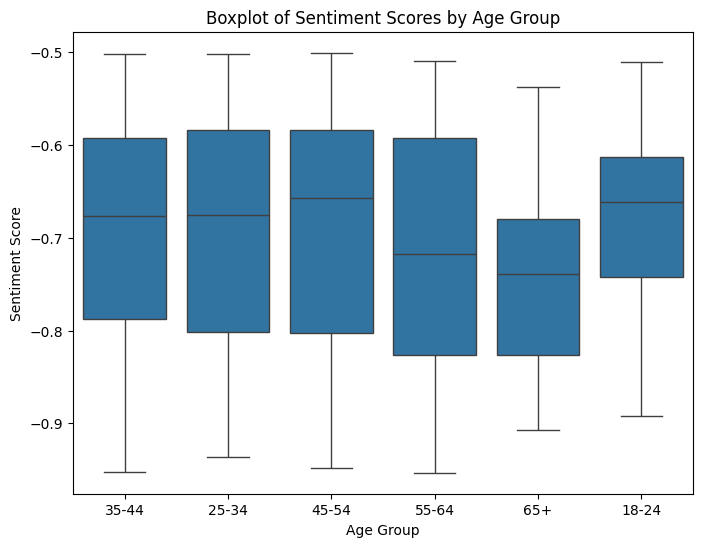

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Age Group", y='Sentiment Score', data=negative_df)

plt.xlabel('Age Group')
plt.ylabel('Sentiment Score')
plt.title('Boxplot of Sentiment Scores by Age Group')

plt.show()

Regress Negative Sentiment Scores on Age

Intercept:  -0.6604431780736812 
  Slope:  -0.0007780779106995444


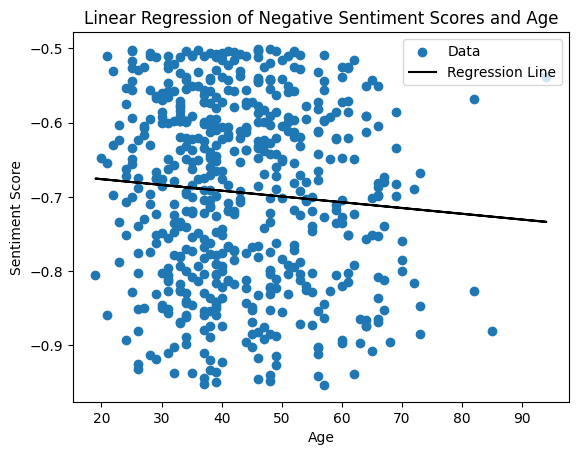

In [ ]:
x = negative_df['Age']
y = negative_df['Sentiment Score']

coef = slr(x,y) # Single Linear Regression
print('Intercept: ',coef['b0'], '\n', ' Slope: ', coef['b1'])

y_hat = coef['b0']+coef['b1']*x # Compute predictions

# Scatter plot of fit:
plt.scatter(x,y,label='Data')
plt.plot(x,y_hat,label='Regression Line',color='black')
plt.xlabel("Age")
plt.ylabel("Sentiment Score")
plt.legend(loc='upper right')
plt.title('Linear Regression of Negative Sentiment Scores and Age')

plt.show()

Boxplot of Negative Sentiment Scores by Department Name

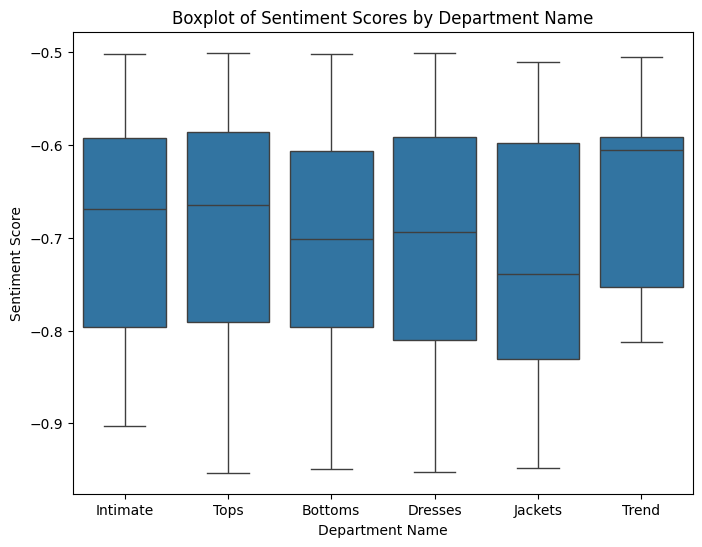

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Department Name", y='Sentiment Score', data=negative_df)

plt.xlabel('Department Name')
plt.ylabel('Sentiment Score')
plt.title('Boxplot of Sentiment Scores by Department Name')

plt.show()

Regress Negative Sentiment Scores on Ages >= 55

Intercept:  -0.6828360592000808 
  Slope:  -0.0005983069928879888


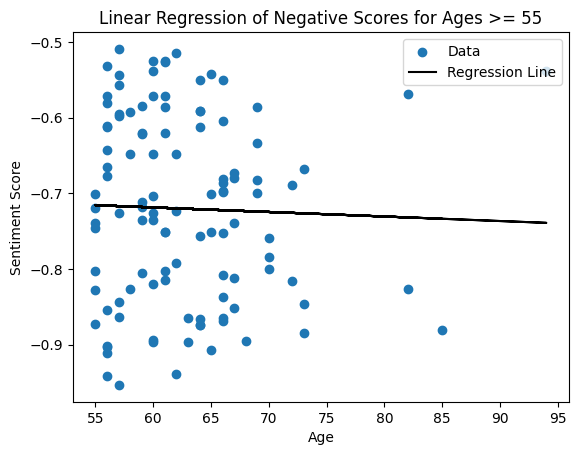

In [ ]:
x = negative_df[negative_df['Age'] >= 55]['Age']
y = negative_df[negative_df['Age'] >= 55]['Sentiment Score']

coef = slr(x,y) # Single Linear Regression
print('Intercept: ',coef['b0'], '\n', ' Slope: ', coef['b1'])

y_hat = coef['b0']+coef['b1']*x # Compute predictions

# Scatter plot of fit:
plt.scatter(x,y,label='Data')
plt.plot(x,y_hat,label='Regression Line',color='black')
plt.xlabel("Age")
plt.ylabel("Sentiment Score")
plt.legend(loc='upper right')
plt.title('Linear Regression of Negative Scores for Ages >= 55')

plt.show()

Creating a filtered data frame with Negative Sentiment Scores and Bottoms

In [ ]:
neg_bottoms_df = negative_df[(negative_df["Department Name"]=="Bottoms")]
neg_bottoms_df.shape

(87, 44)

Regress Negative Sentiment Scores on Age for Bottoms

Intercept:  -0.66233190009194 
  Slope:  -0.0008858576553514443


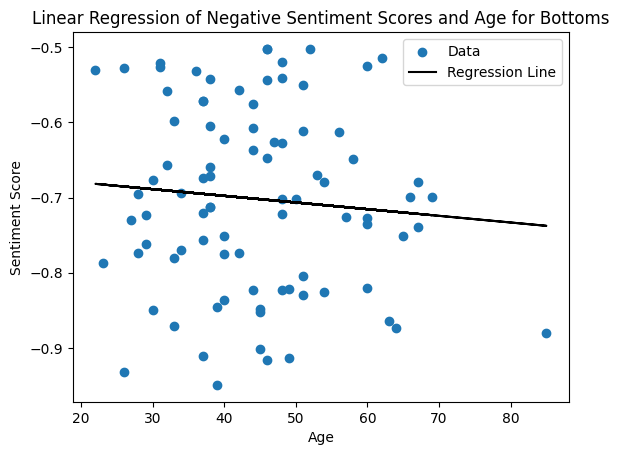

In [ ]:
x = neg_bottoms_df['Age']
y = neg_bottoms_df['Sentiment Score']

coef = slr(x,y) # Single Linear Regression
print('Intercept: ',coef['b0'], '\n', ' Slope: ', coef['b1'])

y_hat = coef['b0']+coef['b1']*x # Compute predictions

# Scatter plot of fit:
plt.scatter(x,y,label='Data')
plt.plot(x,y_hat,label='Regression Line',color='black')
plt.xlabel("Age")
plt.ylabel("Sentiment Score")
plt.legend(loc='upper right')
plt.title('Linear Regression of Negative Sentiment Scores and Age for Bottoms')

plt.show()

Correlation between Sentiment Score and Product Type

In [ ]:
# Extract columns related to product types (assuming column names start with 'Class Name_')
product_columns = negative_df.filter(like='Class Name_')

# Add Sentiment Score to the filtered product type columns
df_for_correlation = pd.concat([product_columns, negative_df['Sentiment Score']], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_for_correlation.corr()

# Extract correlations with Sentiment Score
sentiment_corr = correlation_matrix['Sentiment Score'].drop('Sentiment Score')

# Sort correlations to see which product types correlate most with sentiment scores
sentiment_corr_sorted = sentiment_corr.sort_values(ascending=False)

# Display the sorted correlations
print(sentiment_corr_sorted)

Class Name_Knits             0.088173
Class Name_Trend             0.030893
Class Name_Shorts            0.028358
Class Name_Lounge            0.014347
Class Name_Intimates         0.012699
Class Name_Legwear           0.001240
Class Name_Sleep            -0.002337
Class Name_Sweaters         -0.002773
Class Name_Jackets          -0.008931
Class Name_Pants            -0.009099
Class Name_Swim             -0.020555
Class Name_Jeans            -0.025414
Class Name_Fine gauge       -0.025950
Class Name_Skirts           -0.028900
Class Name_Dresses          -0.038609
Class Name_Outerwear        -0.084107
Class Name_Casual bottoms         NaN
Class Name_Chemises               NaN
Class Name_Layering               NaN
Name: Sentiment Score, dtype: float64


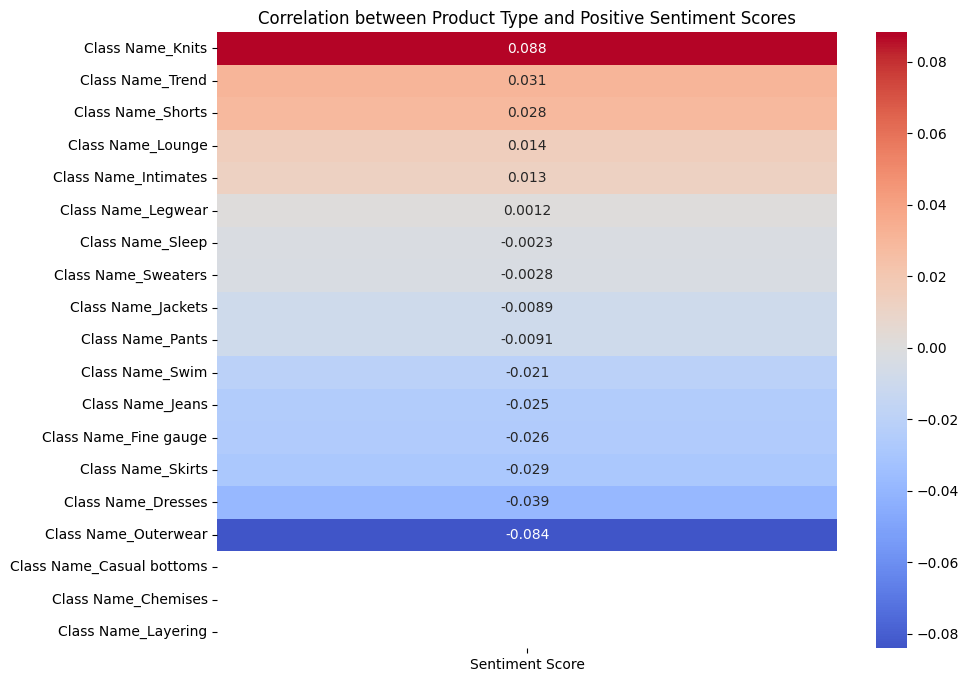

In [ ]:
# Visualize correlation


# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(sentiment_corr_sorted.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Product Type and Negative Sentiment Scores')
plt.show()